In [18]:
# Non-parametric Statistics 
## Chapter 2: Kernel Density Estimation
### Introduction

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from scipy import stats

In [3]:
# this code should work for anyone who cloned the project via github
# as it ensures that you have the correct project structure
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, "..", ".."))
plots_folder = os.path.join(project_root, "plots/chap2")

# Please check this is correct path, hopefully it works fine
plots_folder

'/Users/wuzm/UOEY4S2/nonparam-stats-proj/plots/chap2'

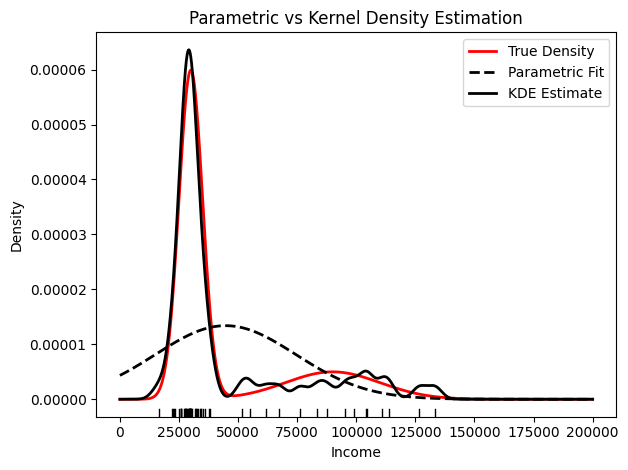

In [7]:
np.random.seed(46)

# synthetic income data with a long-tail distribution 
income_data = np.concatenate([np.random.normal(30000, 5000, 45),
                              np.random.normal(90000, 20000, 15)])
income_data = income_data.reshape(-1, 1)

# Parametric approach
mean, std = norm.fit(income_data)

true_income_range = np.linspace(0, 200000, 10000)
true_density = 0.75 * norm.pdf(true_income_range, 30000, 5000) + 0.25 * norm.pdf(true_income_range, 90000, 20000)

parametric_density = norm.pdf(true_income_range, mean, std)

# KDE approach 
kde = KernelDensity(kernel='gaussian', bandwidth=3000).fit(income_data)
kde_scores = np.exp(kde.score_samples(true_income_range.reshape(-1, 1)))

# Plotting 
#fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

plt.plot(true_income_range, true_density, 'r-', linewidth=2, label='True Density')
plt.plot(true_income_range, parametric_density, 'k--', linewidth=2, label='Parametric Fit')
plt.plot(true_income_range, kde_scores, 'k-', linewidth=2, label='KDE Estimate')

for datapoint in income_data:
    plt.axvline(datapoint, ymin=0, ymax=0.02, color='k', linewidth=1)
plt.title('Parametric vs Kernel Density Estimation')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig(os.path.join(plots_folder, 'param-vs-non-param-kde.png'))
plt.show()




